<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw6/hw6_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from   torch.autograd import Variable

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

In [3]:
#map data
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

furnishing_stat_dict = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}

df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_stat_dict)

map_binary = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[map_binary] = df[map_binary].apply(binary_map)

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [5]:
#normalize data
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus'] # don't normalize output

df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1.406286
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.406286
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.091662
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1.406286
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1.406286


In [6]:
#shuffle and prepare split
n_samples = df.shape[0]
n_val = int(0.2 * n_samples) # 20/80 split

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]


#split training and validation set
y = df.pop('price')
y = y.to_numpy()
x = df.to_numpy()

#convert numpy to tensor
x_train = torch.tensor(x[train_indices], dtype=torch.float32)
y_train = torch.tensor(y[train_indices], dtype=torch.float32)
x_val = torch.tensor(x[val_indices], dtype=torch.float32)
y_val = torch.tensor(y[val_indices], dtype=torch.float32)

Epoch 0, Training Loss 26471846379520.00, Validation Loss: 25181758160896.00
Epoch 500, Training Loss 25548340330496.00, Validation Loss: 24277134868480.00
Epoch 1000, Training Loss 24666416611328.00, Validation Loss: 23413846441984.00
Epoch 1500, Training Loss 23823258746880.00, Validation Loss: 22589097377792.00
Epoch 2000, Training Loss 23016165605376.00, Validation Loss: 21800228487168.00
Epoch 2500, Training Loss 22242983411712.00, Validation Loss: 21045119549440.00
Epoch 3000, Training Loss 21502013472768.00, Validation Loss: 20322094940160.00
Epoch 3500, Training Loss 20791928291328.00, Validation Loss: 19629848133632.00
Epoch 4000, Training Loss 20111702360064.00, Validation Loss: 18967364108288.00
Epoch 4500, Training Loss 19460555538432.00, Validation Loss: 18333871112192.00
Epoch 5000, Training Loss 18837892235264.00, Validation Loss: 17728784039936.00
Epoch 5500, Training Loss 18243251077120.00, Validation Loss: 17151644663808.00
Epoch 6000, Training Loss 17676271353856.00,

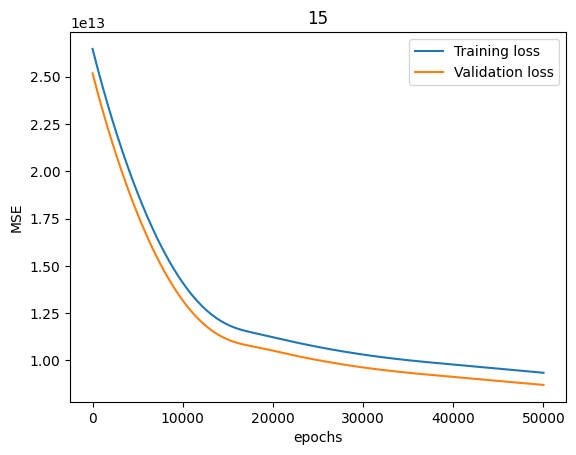

In [20]:
input_dim = 12 #
output_dim = 1 #
n_layer1 = 32
n_layer2 = 64
n_layer3 = 16

model = nn.Sequential(
            nn.Linear(input_dim, n_layer1), #layer 1
            nn.Tanh(),
            nn.Linear(n_layer1, n_layer2), # layer 2
            nn.Tanh(),
            nn.Linear(n_layer2, n_layer3), # layer 3
            nn.Tanh(),
            nn.Linear(n_layer3, output_dim))

learning_rate = 15 #huge, but working great

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()


training_loss_history = []
validation_loss_history = []

n_epochs = 50000

for epoch in range(n_epochs):

    out = model(x_train)
    loss = loss_fn(out, y_train)


    with torch.no_grad():
      val_pred = model(x_train)
      val_loss = loss_fn(val_pred, y_val)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    training_loss_history.append(loss.item())#store loss
    validation_loss_history.append(val_loss.item())

    if epoch % 500 == 0: #report loss every 500 epochs
      print('Epoch %d, Training Loss %.2f, Validation Loss: %.2f' % (epoch, float(loss), float(val_loss)))

print('\n')
plt.plot(training_loss_history, label="Training loss")
plt.plot(validation_loss_history, label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend()
plt.title(learning_rate)
plt.show()

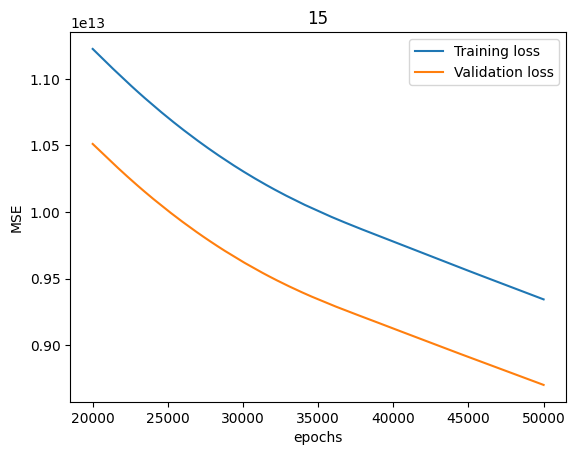

In [21]:
print('\n')
x_achse = np.linspace(20000, 50000, 30000)

plt.plot(x_achse, training_loss_history[20000:], label="Training loss")
plt.plot(x_achse, validation_loss_history[20000:], label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend()
plt.title(learning_rate)
plt.show()